##  Simple Linear Regression

In this Task we will use Simple Linear Regression to Predict the Score of an student based on the no. of study hours.

### Importing libraries :

In [410]:
import numpy as np 
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

### Dowloading the dataset :

In [411]:
url_data="http://bit.ly/w-data"
data=pd.read_csv(url_data)
# Taking a look at the first few rows :
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Data Analysis :

In [429]:
#Dimension of the Hours_Score dataset :
(m,n)=data.shape
print("dimension of student_score dataset : (m,n) =",(m,n))

dimension of student_score dataset : (m,n) = (25, 2)


In [412]:
#information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [413]:
#Description of the dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


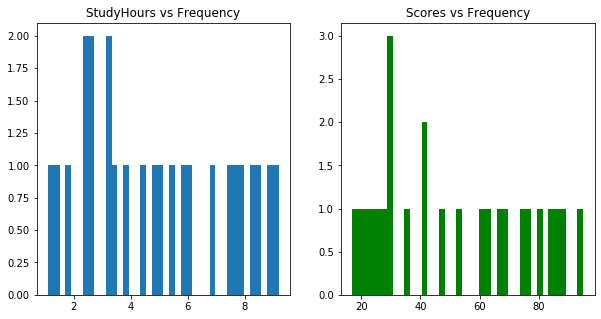

In [494]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axs[0].hist(data["Hours"],bins=40)
axs[1].hist(data['Scores'],bins=40,color='g')
axs[0].title.set_text('StudyHours vs Frequency')
axs[1].title.set_text('Scores vs Frequency')
plt.show()

### Data Visualization :

<Figure size 360x360 with 0 Axes>

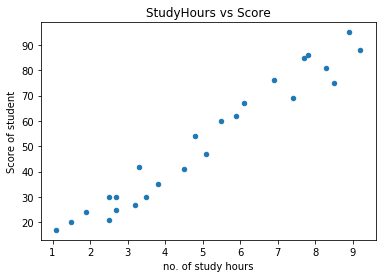

In [502]:
fig=plt.figure(figsize=(5,5))
data.plot(kind="scatter",x="Hours",y="Scores")
plt.xlabel("no. of study hours")
plt.ylabel("Score of student")
plt.title("StudyHours vs Score")
plt.show()

###  Correlation  :

In [416]:
r,p_value=stats.pearsonr(data.Hours,data.Scores)
print("correlation coefficient : ",r)
print("p_value : ",p_value)

correlation coefficient :  0.9761906560220884
p_value :  9.132624467460325e-17


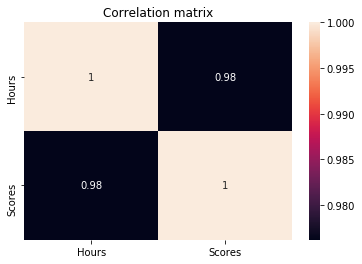

In [499]:
corr_matrix=data.corr()
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation matrix")
plt.show()

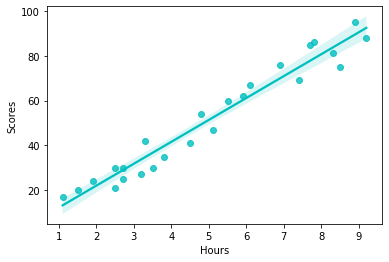

In [500]:
#drawing the realtionship between Hours and Scores
sns.regplot(x="Hours",y="Scores",data=data,color='c')
plt.show()

### Training Linear Model:

In [418]:
#separating X (feature) from y (target variable)
X=data.iloc[:,0:n-1]
y=data.iloc[:,n-1]

In [419]:
#Spliting the Hours_Score Dataset (70% (trainset) , 30% (testset))
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=90)

In [420]:
#Creating the model and fit it
model=LinearRegression().fit(X_train,y_train)
print("Done")

Done


In [421]:
y_predict=model.predict(X_train)

In [422]:
r_training=model.score(X_train,y_train)
print("coefficient of determination (Training Score):",r_training)

coefficient of determination (Training Score): 0.9412182244264513


Text(0.5, 1.0, 'StudyHours vs Score (Training Set)')

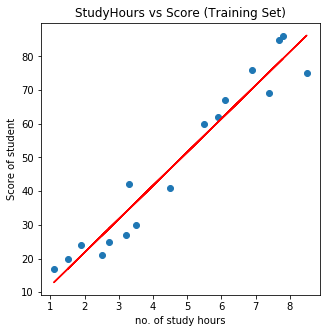

In [474]:
#drawing the best fit Line on the training set :
fig=plt.figure(figsize=(5,5))
plt.scatter(X_train,y_train)
plt.plot(X_train,y_predict,c="r")
plt.xlabel("no. of study hours")
plt.ylabel("Score of student")
plt.title("StudyHours vs Score (Training Set)")

### Predictions on the Test Set

In [424]:
y_test_pred=model.predict(X_test)

In [425]:
r_test=model.score(X_test,y_test)
print("coefficient of determination (Test Score):",r_training)

coefficient of determination (Test Score): 0.9412182244264513


In [426]:
#Comparing Actual and predicted
Comp=pd.DataFrame({'Actual':y_test,'predicted':y_test_pred})
Comp

,Actual,predicted
1,47,52.552649
22,35,39.670030
21,54,49.579737
20,30,28.769352
15,95,90.209536
6,88,93.182448
8,81,84.263712
16,30,26.787411


Text(0.5, 1.0, 'StudyHours vs Score (Test set)')

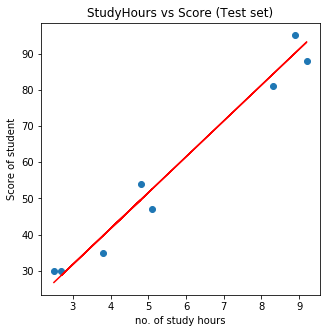

In [475]:
#Drawing the fit line on the test set
fig=plt.figure(figsize=(5,5))
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred,c="r")
plt.xlabel("no. of study hours")
plt.ylabel("Score of student")
plt.title("StudyHours vs Score (Test set)")

#### What will be predicted score if a student studies for 9.25 hrs/ day?

In [428]:
score = model.predict([[9.25]])[0]
print(" if a student studies for 9.25 hours/daye,he is most likely to score : {:.2f} %".format(score))

 if a student studies for 9.25 hours/daye,he is most likely to score : 93.68 %
